<font size=+3 color="#3D3D3D"><center><b>AI interview assignment - Sentiment analysis (NLP) </b></center></font>

<center> <img src="https://images.unsplash.com/photo-1633613286991-611fe299c4be?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1740&q=80" width = 800> </center>
<center><em>Photo by Towfiqu barbhuiya (Unsplash)</em></center>

# 1. Problm Understanding
 
You are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?



In this notebook we will try to make a model that analyise customer comments and classify them as "positive" or "negative". 
1. Business often receive customers feedback on social network platforms like instagram, facebook etc without any ratings. It is hard for business to keep track of all the key responses and improve themselves. Hence it will be important for businesses to grade their customer responses.

2. To solve this problem we need data that contain customer responses along with their ratings.

3. In this notebook we will collect google reviews of various restaurants along with customers ratings to prepare our dataset

4. In our prepared dataset following thing we should take care
    - there should be proper balance between positive and negative class.
    - our dataset should not contain any null values and duplicate values.
    - customer comments should be cleaned if there is any special character or an emoji.
    - comments are to be converted in small case for consistency.
    - stemming applied on comments to improve model performance.

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc. 

(Data downloaded from website like Kaggle will be awarded negative marks.)

## 2.1 Code for scraping data from website



In [2]:
##---------Type the code below this line------------------##

Here for scrapping google reviews of various restaurants we will be using selenium along with beautifulsoup.

In [3]:
# Importing Libraries
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import ElementNotVisibleException
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup

print('✔️ Libraries imported successfully!')

✔️ Libraries imported successfully!


In [4]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\gs\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache
C:\Users\gs\AppData\Local\Temp\ipykernel_13460\1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [4]:
#list for storing our scrapped comments and ratings 
reviews = []
#sample pin code list, as scrapping for all pin codes at once takes much time
#i have scrapped for other pin codes also and stored there result in excel file, all files will be attached with this notebook
#to enhance future capability we can store scrapped result in a database.
pincodes = ["110001","110002","110003"]
# Scrape results for every pincode in list pincodes 
for pincode in pincodes:
    
    # Scrapping top 10 results for restaurants search on a pincode 
    for i in range(10):

        driver.implicitly_wait(30)

        query = "Restaurants  near " + pincode

        driver.get("https://www.google.com/search?q=" + query)
        wait = WebDriverWait(driver, 10)
        # search query in browser
        ActionChains(driver).move_to_element(wait.until(EC.element_to_be_clickable(
            (By.XPATH, "//a[contains(@href, '/search?tbs')]")))).perform()
        wait.until(EC.element_to_be_clickable(
            (By.XPATH, "//a[contains(@href, '/search?tbs')]"))).click()
        # iterate over restaurants list and select the i number restaurant from the search result
        for count, element in enumerate(driver.find_elements(By.XPATH, "//div[@aria-level='3']")):
            if count == i:
                menu_bt = wait.until(EC.element_to_be_clickable(element))
                menu_bt.click()


        try:
            
            # click on the "reviews" object
            review_bt = wait.until(EC.element_to_be_clickable(
                                   (By.XPATH, '//html/body/div[6]/div/div[9]/div[2]/div/div[2]/async-local-kp/div/div/div[1]/div/div/block-component/div/div[1]/div/div/div/div[1]/div/div/div[1]/div/div[2]/div[1]/div/div/span[3]/span/a/span'))
                               )  
            review_bt.click()
            
            #click on the "newest" button
            newest_bt = wait.until(EC.element_to_be_clickable(
                                   (By.XPATH, '//html/body/span/g-lightbox/div/div[2]/div[3]/span/div/div/div/div[2]/div[3]/g-scrolling-carousel/div[1]/div/div[2]'))
                               )
            newest_bt.click()
            
            # feed response of above action to beautifulsoup
            response = BeautifulSoup(driver.page_source, 'html.parser')
            
            # select class "review-dialog-list" to select all the reviews
            doc = response.find(class_='review-dialog-list')
            # find ratings
            rating = doc.find_all(class_='Fam1ne EBe2gf')
            # find review
            review_text = doc.find_all(class_='Jtu6Td')
            
            # loop over every rating and collect its corresponding review
            for i in range(len(rating)):
                try:
                    # exrtract text review message
                    review_message = review_text[i].find(class_ = 'review-snippet').text
                except Exception:
                    review_message = None
                # extract customer rating number
                rating_value = rating[i]['aria-label'][6]
                # create record dictionary
                user_rec = {"review": review_message, "rating": rating_value}
                # append dictionary to final list
                reviews.append(user_rec)
        except Exception:
            pass


In [5]:
print("Number of records scrapped : ",len(reviews))

Number of records scrapped :  220


## 2.2 Code for converting the above scraped data into a dataframe

In [ ]:
##---------Type the code below this line------------------##

In [5]:
import pandas as pd
import numpy as np
print('✔️ Libraries imported successfully!')

✔️ Libraries imported successfully!


In [ ]:
# converting our reviews list to dataframe
df = pd.DataFrame(reviews,
               columns =['review', 'rating'])

In [8]:
df.head()

,review,rating
0,One of the nicest place to have buffet experie...,5
1,None,4
2,By far this is one of the best buffet places i...,4
3,Amazing place for unlimited buffet. The servic...,5
4,Last time visit there on my birthday and they ...,5


In [9]:
# export dataset as an excel file
df.to_excel("google_review_16.xlsx", index=False)

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [ ]:
##---------Type the code below this line------------------##

In [55]:
# integrate all previously scrapped data for different pin codes, as it takes time to extracting all data in one single batch
# there are 16 files we concat all of them with this loop, all excel file will be attached with this notebook
file_name = 'google_review_{}.xlsx'
df_list = []
for i in range(0, 17):
    df_list.append(pd.read_excel(file_name.format(i)))

df = pd.concat(df_list)
#reset_index of new df
df.reset_index(drop=True,inplace = True)

In [56]:
# display first 5 rows of dataframe
df.head()

,review,rating
0,NaN,5
1,NaN,5
2,NaN,5
3,NaN,5
4,NaN,5


In [10]:
# display last 5 rows of dataframe
df.tail()

,review,rating
1125,"Food presentation was good, taste was average....",3
1126,NaN,5
1127,Nice place to sit down with friends. Luckily w...,4
1128,NaN,5
1129,From adding spice to boring day to cheering up...,5


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [11]:
##---------Type the code below this line------------------##

In [12]:
# to print statistical info
df.describe()

,rating
count,1130.000000
mean,4.237168
std,1.120878
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


it only shows rating column as df.describe give statistic information of only numeric columns

In [13]:
# to print info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  341 non-null    object
 1   rating  1130 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?


1. Dataset contains 1130 records
2. There are 2 columns one is review column with Dtype object("string") other is rating column with Dtype int64("numeric")
3. There are lot of null values in review column, these are those records where customer just gives ratings without giving any review.

# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [14]:
##---------Type the code below this line------------------##

In [15]:
#number of unique values in each column
print("Number of unique value in 'review' column : ",df['review'].nunique())
print("Number of unique value in 'rating' column : ",df['rating'].nunique())

Number of unique value in 'review' column :  320
Number of unique value in 'rating' column :  5


## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [16]:
##---------Type the code below this line------------------##

In [17]:
# number of duplicate record
print("Number of duplicate records : ", len(df[df.duplicated()]))

Number of duplicate records :  805


In [18]:
df[df.duplicated()]

,review,rating
1,NaN,5
2,NaN,5
3,NaN,5
4,NaN,5
5,NaN,5
...,...,...
1121,NaN,5
1122,NaN,5
1123,NaN,5
1126,NaN,5


These duplicate records are mostly Nan review with same ratings, there are also some duplicate reviews all of them are not helpful for our model. Hence we drop these duplicated records 

In [19]:
# Drop duplicate values
df.drop_duplicates(inplace=True)
# reset idex
df.reset_index(drop=True,inplace = True)

In [20]:
# again check the number of duplicate record
print("Number of duplicate records : ", len(df[df.duplicated()]))

Number of duplicate records :  0


## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [21]:
##---------Type the code below this line------------------##

In [22]:
# finding null values
df.isnull().sum()

review    5
rating    0
dtype: int64

there are 5 Nan values in review column as most of the null values dropped while removing duplicates 

## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [23]:
##---------Type the code below this line------------------##

There are many commonly used imputation technique like mean/median imputation, mode imputation etc. but for our case we have missing values in reviews column which we can't predict, Hence we will be dropping the Nan values 

In [24]:
# drop null values
df.dropna(inplace=True)
# reset idex
df.reset_index(drop=True,inplace = True)

In [25]:
# again check null values
df.isnull().sum()

review    0
rating    0
dtype: int64

## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [26]:
##---------Type the code below this line------------------##

In [27]:
# importing libraries for feature engineering and model training

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print('✔️ Libraries imported successfully!')

✔️ Libraries imported successfully!


we have to check our review column for the following things

   - there should be no special characters, symbols or emoji's in review
   - all reviews must be in lower case
   - remove all the common helper words used in sentence formation


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  320 non-null    object
 1   rating  320 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


In [29]:
df.review

0      Extremely good ambience and very good hospital...
1      It is actually a very beautiful fancy vegetari...
2      The food is not that great, also it is very ve...
3      I had a special veg thali from here. The taste...
4      Osm.The quick, brown fox jumps over a lazy dog...
                             ...                        
315    I visit Khan market quite often when I'm in De...
316    Good to be back after 2 long years.The high po...
317    Food presentation was good, taste was average....
318    Nice place to sit down with friends. Luckily w...
319    From adding spice to boring day to cheering up...
Name: review, Length: 320, dtype: object

- There are various comma and fullstop in reviews
- Reviews are in mixed case (i.e lower and upper)
- There are various helper words in the reviews

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [30]:
##---------Type the code below this line------------------##

In [31]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

stemming is the process of converting a word to its basic form or stem. This will help model to generalise words in reviews and give better performance. Let's look an example

In [32]:
# stemming example
words = ['love','loved','loving']
for word in words:
    print(word,"--->",ps.stem(word))

love ---> love
loved ---> love
loving ---> love


In [33]:
# let's look in stop_word set
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

after analysing stop_word set it is noted that some keywords like "not","no" are useful in identifying the negative comments hence we remove some of those keywords from stop_word set

In [34]:
remove_stop_word = ['aren', "aren't", 'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'don',
 "don't", 'isn',"isn't",'no','nor','not','wasn',"wasn't",'weren',"weren't", "won't"]
stop_words_new = stop_words - set(remove_stop_word)

In [35]:
stop_words_new

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than

In [36]:
def text_transformation(usr_review):

    mod_review = usr_review
    # return only A-Z,a-z and " " in our review
    mod_review = re.sub('[^a-zA-Z]',' ',str(mod_review))
    # convert reviews in lower case
    mod_review = mod_review.lower()
    # split reviews on the basis of space
    mod_review = mod_review.split()
    # feed splitted individual words to stemmer which are not in stop_words 
    mod_review = [ps.stem(word) for word in mod_review if word not in stop_words_new]
    #return stemmed reviews
    return (' '.join(str(y) for y in mod_review))

In [37]:
# Creating new column "stem_review"
df['stem_review'] = df['review'].apply(lambda x: text_transformation(x))

In [38]:
df['stem_review']

0      extrem good ambienc good hospit staff went tri...
1      actual beauti fanci vegetarian restaur near ch...
2      food not great also expens earlier tri sushi a...
3      special veg thali tast thw food good bit oili ...
4      osm quick brown fox jump lazi dog dj flock mtv...
                             ...                        
315    visit khan market quit often delhi time around...
316    good back long year high point alway terrac si...
317    food present good tast averag servic prompt st...
318    nice place sit friend luckili got tabl insid r...
319    ad spice bore day cheer mood summer cocktail m...
Name: stem_review, Length: 320, dtype: object

We have checked the column data and found
- No comma and fullstop or special charter in reviews
- All reviews in lower case
- There are no helper words in the reviews
- Reviews are stemmed

## 3.7 Identify the target variables.


In [ ]:
##---------Type the code below this line------------------##

Our target is to predict "positive" and "negative" review. Hence we will make a new feature "response" with following criterion

   - rating greater than 3 marked as positive response(0)
   - rating less than equal to 3 marked as negative response(1)
   - we do this transformation in section 3.9

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [ ]:
##---------Type the code below this line------------------##

In [41]:
# train_test split
X = df['stem_review']
y = df['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [ ]:
##---------Type the code below this line------------------##

In [39]:
def positive_negative(x):
    if x > 3:
        y = 0 # positive review
    else:
        y = 1 # negative review
    return y

In [40]:
df['response'] = df['rating'].apply(lambda x: positive_negative(x))

# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

In [ ]:
##---------Type the code below this line------------------##

In [ ]:
## Scatter plot dummy code
# plt.scatter(df_dummy['X'],df_dummy['y'])
# plt.title('dummy_title')
# plt.xlabel('x_label')
# plt.ylabel("y_label")
# plt.show()

our problem consist of string data, hence we can't plot scatter plot  

## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


In [42]:
##---------Type the code below this line------------------##

In [43]:
# we can't plot sns.pairplot on our dataset

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable. 


In [ ]:
##---------Type the code below this line------------------##

## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.


In [ ]:
##---------Type the code below this line------------------##

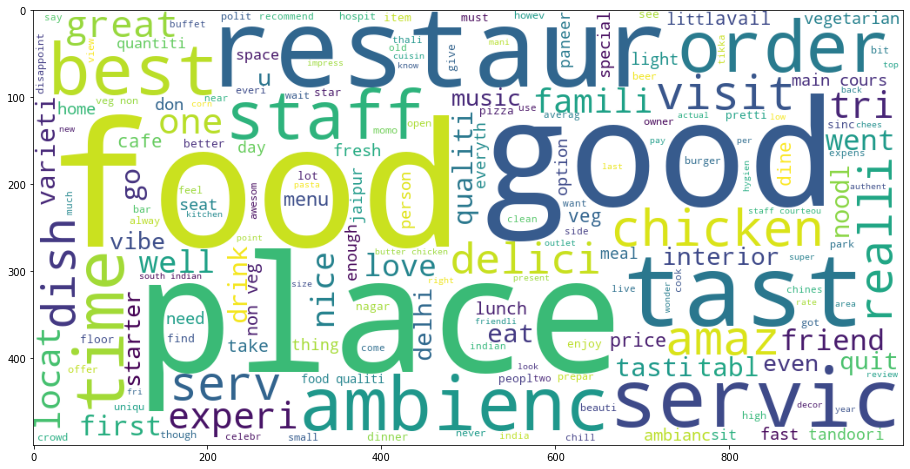

In [45]:
# We can plot WordCloud to get an intution of the important keywords in our reviews
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['stem_review']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

In [ ]:
##---------Type the code below this line------------------##

Correlation matrix is a matrix that displays correlation values between each variable in a dataframe
it is used to summarized the dataframe, it is also used to get the linear relationships between variables. it's value lie between 0 to 1.

   - -1 : high negative linear correlation
   - 0 : no linear correlation
   - 1 : high positive linear correlation

If two variable has high negative or positive correlation then we should remove one variable as it is not providing any new information to our model


In [ ]:
## We can't plot correlation matrix on our dataframe
## code for plotting correlation matrix
# fig, ax = plt.subplots(figsize=(12, 12))
# dataplot = sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=False)
# plt.show()

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>) 

Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

In [ ]:
##---------Type the code below this line------------------##

## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

In [ ]:
##---------Type the code below this line------------------##

In [46]:
# countVectorizer transforrm text data to vectors, so that model can process data
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(X_train)
testdata = cv.transform(X_test)
X_train_transformed = traindata
X_test_transformed = testdata

In [47]:
print("Number of records in X_trains : ",len(X_train))

Number of records in X_trains :  214


In [48]:
# It is a sparse matrix of 214 rows and 4601 columns
X_train_transformed

<214x4601 sparse matrix of type '<class 'numpy.int64'>'
	with 7242 stored elements in Compressed Sparse Row format>

In [49]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
y_pred = clf.predict(X_test_transformed)

In [51]:
def confusion(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(7, 4))
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data,columns = ['0','1'], index = ['0','1'])
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm,annot=True, fmt='',ax=ax)
    plt.tight_layout();

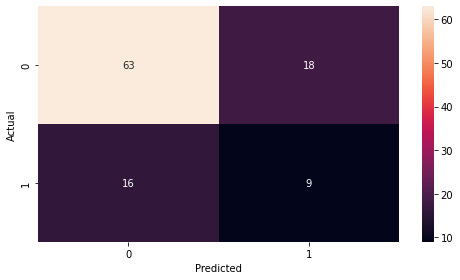

In [52]:
confusion(y_test,y_pred)

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [ ]:
##---------Type the code below this line------------------##

In [70]:
# we have 4601 features and all are vectors
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X_train_transformed, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 4601 out of 4601 | elapsed:  1.2min finished

[2022-06-09 20:36:03] Features: 1/5 -- score: 0.780373831775701[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 4600 out of 4600 | elapsed:  1.2min finished

[2022-06-09 20:37:14] Features: 2/5 -- score: 0.7990654205607477[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 4599 out of 4599 | elapsed:  1.1min finished

[2022-06-09 20:38:21] Features: 3/5 -- score: 0.8084112149532711[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [71]:
sfs1.subsets_

{1: {'feature_idx': (306,),
  'cv_scores': array([0.78037383]),
  'avg_score': 0.780373831775701,
  'feature_names': ('306',)},
 2: {'feature_idx': (306, 3873),
  'cv_scores': array([0.79906542]),
  'avg_score': 0.7990654205607477,
  'feature_names': ('306', '3873')},
 3: {'feature_idx': (306, 620, 3873),
  'cv_scores': array([0.80841121]),
  'avg_score': 0.8084112149532711,
  'feature_names': ('306', '620', '3873')},
 4: {'feature_idx': (306, 620, 1371, 3873),
  'cv_scores': array([0.81775701]),
  'avg_score': 0.8177570093457944,
  'feature_names': ('306', '620', '1371', '3873')},
 5: {'feature_idx': (306, 620, 1371, 1875, 3873),
  'cv_scores': array([0.8271028]),
  'avg_score': 0.8271028037383178,
  'feature_names': ('306', '620', '1371', '1875', '3873')}}

Top 5 features with feature_idx ['306', '620', '1371', '1875', '3873']

In [54]:
# extracting important feature names
for i in [306, 620, 1371, 1875, 3873]:
    print("Top 5 features_name for identifying negative review : ",cv.get_feature_names_out()[i])

Top 5 features_name for identifying negative review :  bad
Top 5 features_name for identifying negative review :  charg
Top 5 features_name for identifying negative review :  famili
Top 5 features_name for identifying negative review :  head
Top 5 features_name for identifying negative review :  star


## 5.5 Conclude the top 3 significant features with necessary justifications.

--------------Type the answers below this line--------------

top 3 features('keywords') for identifying negative review
   - bad : important keyword for classification as people use bad more in negative review rather than "not bad" in positive review
   - charg : this keyword is related with "charge", money is an important factor for giving bad reviews as people often give negative reviews when charged more
   - famili : this keyword can also be seen in many reviews, "not a place to go with family"

In this notebook we have implemented a basic nlp customer sentiment analyzer model with scrapped data. There are various thing that we can do improve this model.
   - we can make pipelines to store data in a Database
   - we need to collect more data to make model understand the differrence between positive and negative review
   - we can use various other techniques like lemmantizing to improve model
   - with enough data we can apply neural networks to classify reviews
   - we can create more sub categories like happy,moderate,sad etc